# Interface 2024年12月号

## 1次元の例: 移動平均

### リスト1～リスト3

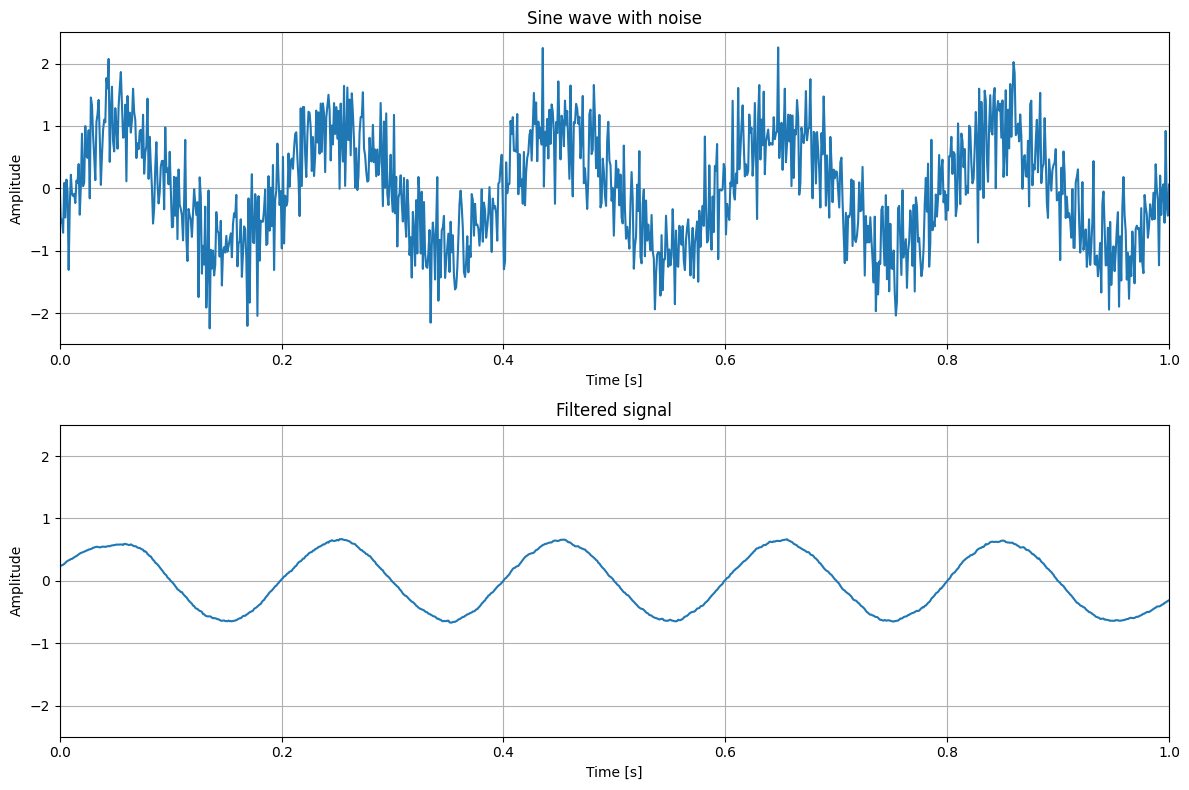

In [1]:
import numpy as np
from scipy.signal import butter, filtfilt, convolve
import matplotlib.pyplot as plt

def generate_noise(size, sampling_rate, cutoff_freq, order=4):
    # ホワイトノイズを生成
    white_noise = np.random.normal(size=size)
    # ナイキスト周波数から標準化された周波数を計算
    nyquist_freq = 0.5 * sampling_rate
    normal_cutoff = cutoff_freq / nyquist_freq
    # バターワースフィルタによりcutoff_freq以上のノイズのみ取り出す
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    low_limited_noise = filtfilt(b, a, white_noise)
    return low_limited_noise

# パラメータ設定
sampling_rate = 1000  # サンプリング数
sine_wave_frequency = 5  # 正弦波の周波数 (Hz)
duration = 1  # 信号の持続時間 (秒)
noise_amplitude = 0.5  # ノイズの振幅
cutoff_freq = 10 # ノイズのカットオフ周波数(Hz)
window_size = 99  # 移動平均フィルタの窓サイズ

# 時間軸の生成
t = np.linspace(0, duration, sampling_rate)
# 正弦波の生成
sine_wave = np.sin(2 * np.pi * sine_wave_frequency * t)
# cutoff_freq[Hz]以上の周波数成分を持つノイズの生成
noise = noise_amplitude * generate_noise(sampling_rate, sampling_rate, cutoff_freq)
# 正弦波にノイズを乗せた信号
noisy_signal = sine_wave + noise
# 移動平均フィルタの適用
moving_avg_filter = np.ones(window_size) / window_size
filtered_signal = convolve(noisy_signal, moving_avg_filter, mode='same')

# 結果のプロット
fig = plt.figure(figsize=(12, 8))
axes = fig.subplots(2, 1)
for ax in axes:
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Amplitude")
    ax.set_xlim(0, 1)
    ax.set_ylim(-2.5, 2.5)
    ax.grid(axis="both", which="both")

axes[0].plot(t, noisy_signal)
axes[0].set_title("Sine wave with noise")
axes[1].plot(t, filtered_signal)
axes[1].set_title("Filtered signal")
plt.tight_layout()
plt.show()

# リスト4  周波数成分を可視化

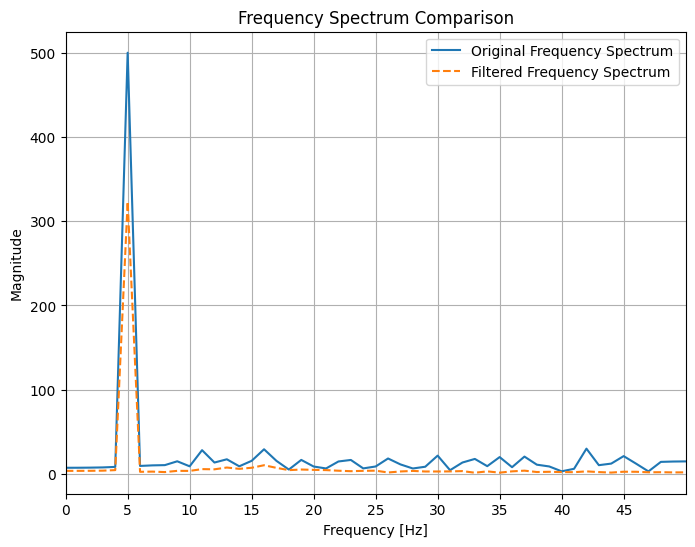

In [2]:
# フーリエ変換の実行
freq_domain_original = np.fft.fft(noisy_signal)
freq_domain_filtered = np.fft.fft(filtered_signal)
freqs = np.fft.fftfreq(sampling_rate, d=duration/sampling_rate)

# 周波数成分の絶対値（強度）を計算
magnitude_original = np.abs(freq_domain_original)
magnitude_filtered = np.abs(freq_domain_filtered)

# 周波数領域の信号プロット
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
freq_mask = (freqs >= 0) & (freqs <= 50)
ax.plot(freqs[freq_mask], magnitude_original[freq_mask], label="Original Frequency Spectrum", linestyle='-')
ax.plot(freqs[freq_mask], magnitude_filtered[freq_mask], label="Filtered Frequency Spectrum", linestyle='--')
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Magnitude")
ax.set_xlim(0, 50)
ax.set_xticks(np.arange(0, 50, 5))  # 5Hzごとに目盛りを追加
ax.grid(which='both', axis='both')  # 5Hzごとに線を追加
ax.legend()
ax.set_title("Frequency Spectrum Comparison")
plt.show()

## リスト5 周波数特性

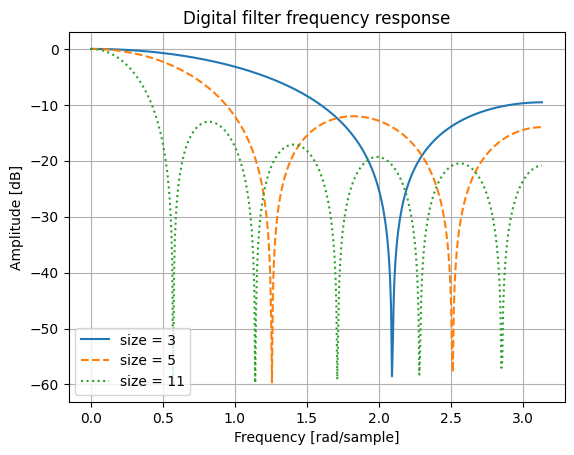

In [3]:
from scipy import signal
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('Digital filter frequency response')

for size in [(3, '-'), (5, '--'), (11, ':')]:
    b = np.ones(size[0]) / size[0]
    w, h = signal.freqz(b)
    ax.plot(w, 20 * np.log10(abs(h)), linestyle=size[1], label=f'size = {size[0]}')

ax.set_ylabel('Amplitude [dB]')
ax.set_xlabel('Frequency [rad/sample]')
ax.grid()
ax.legend()
plt.show()

## リスト6～9   

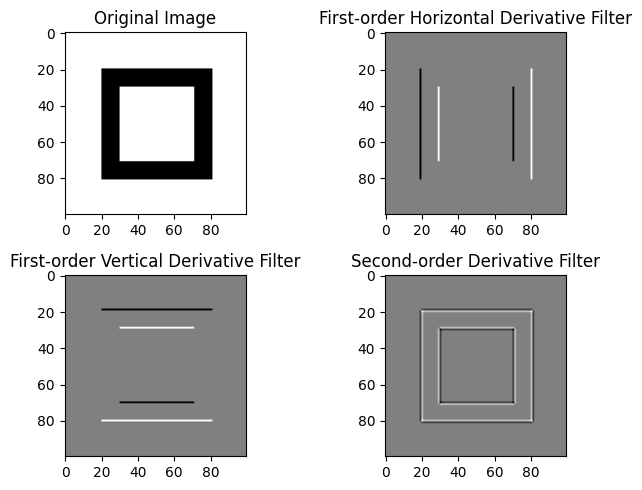

In [4]:
import numpy as np
from scipy.ndimage import convolve
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# PILで新しい画像を作成し、図形を描画
image = Image.new("L", (100, 100), "white")
draw = ImageDraw.Draw(image)
draw.rectangle([(20, 20), (80, 80)], outline="black", width=10)

# PILの画像をNumPy配列に変換
image_np = np.array(image, dtype=np.int32)

# 畳み込みフィルタを定義
filters = [
     ('First-order Horizontal Derivative Filter',
      np.array([[0, 0, 0],
               [1, -1, 0],
               [0, 0, 0]])), # 1次横方向
     ('First-order Vertical Derivative Filter',
      np.array([[0, 1, 0],
               [0, -1, 0],
               [0, 0, 0]])), # 1次縦方向
     ('Second-order Derivative Filter',
      np.array([[0, 1, 0],
               [1, -4, 1],
               [0, 1, 0]]))  # 2次両方向
]

# 畳み込み演算を適用
convolved_images = [('Original Image', image_np)]
for f in filters:
    im = convolve(image_np, f[1], mode='constant', cval=255)
    convolved_images.append((f[0], im))

# 結果を表示
fig, axes = plt.subplots(2, 2, figsize=(7, 5))
for i in range(len(convolved_images)):
    ax = axes[i // 2, i % 2]
    ax.imshow(convolved_images[i][1], cmap="gray")
    ax.set_xticks(np.arange(0, 100, 20))
    ax.set_yticks(np.arange(0, 100, 20))
    ax.set_title(convolved_images[i][0])

plt.tight_layout()
plt.show()

## リスト10～11　(リスト6～9に続いて実行)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


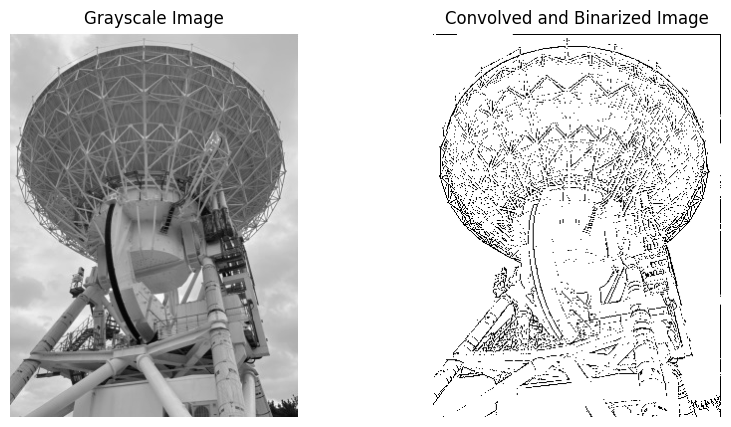

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# 画像の読み込み
drive.mount('/content/drive')
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/パラボラアンテナ.jpeg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = gray_image.astype(np.int32)

# 2次の微分フィルタを畳み込み演算を適用
filter = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
convolved_image = convolve(gray_image, filter)
convolved_image = 255 - np.clip(convolved_image, 0, 255).astype(np.uint8)
_, convolved_image = cv2.threshold(convolved_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#  結果を表示
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Convolved and Binarized Image')
plt.imshow(convolved_image, cmap='gray')
plt.axis('off')

plt.show()

## リスト１２～１３

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train[..., tf.newaxis]/255.0, x_test[..., tf.newaxis]/255.0

model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.7712 - loss: 0.6397 - val_accuracy: 0.8738 - val_loss: 0.3517
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.8842 - loss: 0.3238 - val_accuracy: 0.8939 - val_loss: 0.2998
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9001 - loss: 0.2713 - val_accuracy: 0.8686 - val_loss: 0.3382
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9133 - loss: 0.2392 - val_accuracy: 0.8933 - val_loss: 0.2871
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9221 - loss: 0.2125 - val_accuracy: 0.9039 - val_loss: 0.2730


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.7718 - loss: 0.6396 - val_accuracy: 0.8737 - val_loss: 0.3508
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.8844 - loss: 0.3138 - val_accuracy: 0.8896 - val_loss: 0.3091
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9006 - loss: 0.2690 - val_accuracy: 0.8895 - val_loss: 0.3101
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9137 - loss: 0.2325 - val_accuracy: 0.8916 - val_loss: 0.3064
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9232 - loss: 0.2025 - val_accuracy: 0.9040 - val_loss: 0.2603
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
sample image


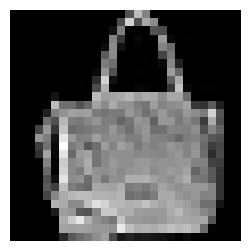

first layer


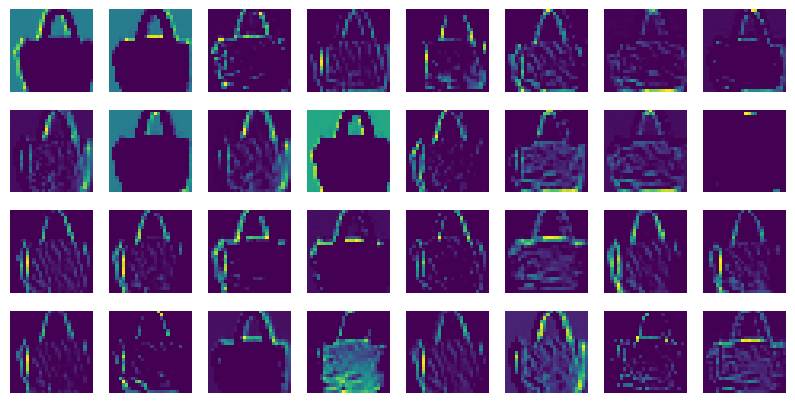

second layer


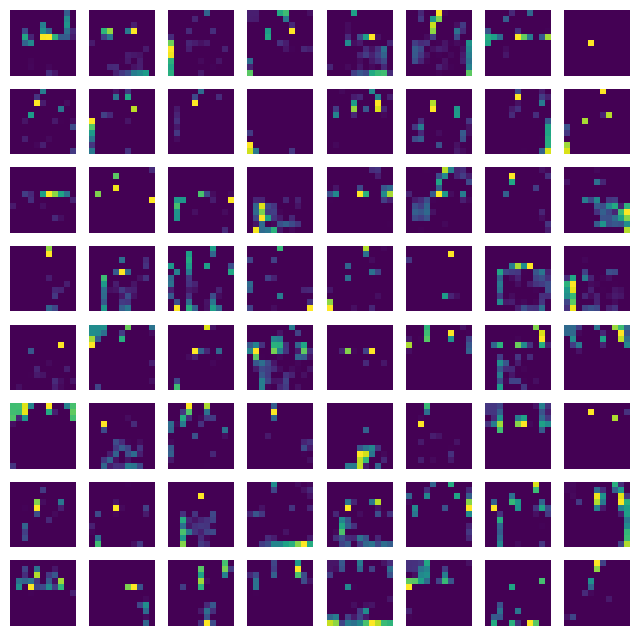

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train[..., tf.newaxis]/255.0, x_test[..., tf.newaxis]/255.0

model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 中間層の出力を取得するためのモデルを作成
layer_outputs = [layer.output for layer in model.layers[:4]]  # 最初の2つのレイヤー (Conv2DとMaxPooling) を取得
activation_model = models.Model(inputs=model.inputs, outputs=layer_outputs)

# サンプル画像を取得して可視化
sample_image = x_test[2000][np.newaxis, ...]  # テストデータから1枚の画像を取得
activations = activation_model.predict(sample_image)

print("sample image")
plt.figure(figsize=(3, 3))
plt.imshow(sample_image[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()

# 1つ目の畳み込み層の可視化
first_layer_activation = activations[0]  # 最初の畳み込み層の出力
num_filters = first_layer_activation.shape[-1]
print("first layer")
plt.figure(figsize=(10, 5))
for i in range(num_filters):
    plt.subplot(4, 8, i+1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()

# 2つ目の畳み込み層の可視化
second_layer_activation = activations[2]  # 2つ目の畳み込み層の出力
num_filters = second_layer_activation.shape[-1]
print("second layer")
plt.figure(figsize=(8, 8))
for i in range(num_filters):
    plt.subplot(8, 8, i+1)  # フィルターの数に応じてグリッドサイズを調整
    plt.imshow(second_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()

# サポート用のコード

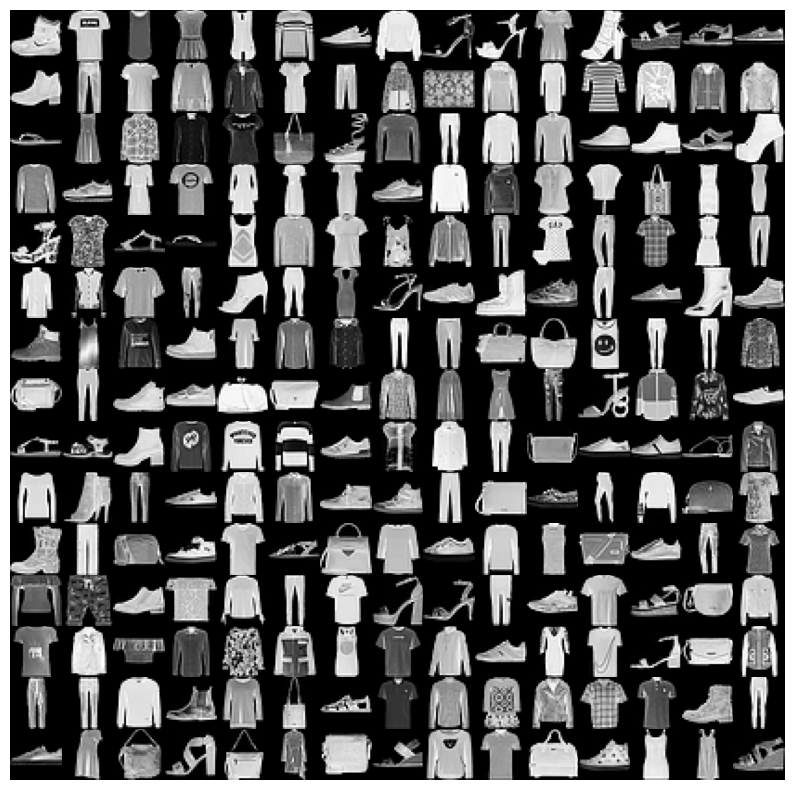

In [9]:
# 最初の100個の画像を取得
images = x_train[:15*15]

# 10x10の格子状に画像を配置
fig, axes = plt.subplots(15, 15, figsize=(10, 10))
plt.subplots_adjust(wspace=0, hspace=0)  # 画像間のマージンを0に設定

# 画像を描画
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')  # 軸を非表示にする

plt.show()

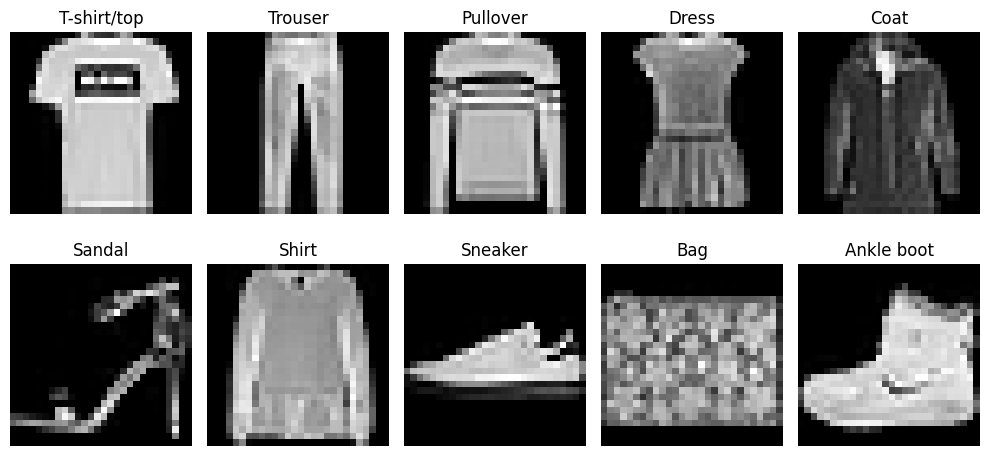

In [10]:
# ラベルの名前
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 各クラスの代表画像を取り出す
representative_images = []
for label in range(10):
    idx = np.where(y_train == label)[0][0]  # 各ラベルの最初のインデックスを取得
    representative_images.append((x_train[idx], class_names[label]))

# 5x2の領域に描画
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# 画像を描画
for i, ax in enumerate(axes.flat):
    image, label = representative_images[i]
    ax.imshow(image, cmap='gray')
    ax.set_title(label)
    ax.axis('off')  # 軸を非表示にする
plt.tight_layout()
plt.show()